In [2]:
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
   ------ --------------------------------- 3.1/19.1 MB 12.0 MB/s eta 0:00:02
   -------------- ------------------------- 6.8/19.1 MB 15.0 MB/s eta 0:00:01
   --------------------- ------------------ 10.2/19.1 MB 15.4 MB/s eta 0:00:01
   --------------------------- ------------ 13.1/19.1 MB 15.3 MB/s eta 0:00:01
   ---------------------------------- ----- 16.3/19.1 MB 15.3 MB/s eta 0:00:01
   ---------------------------------------  18.9/19.1 MB 15.3 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 14.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install nbformat

Defaulting to user installation because normal site-packages is not writeable
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import nbformat
print(nbformat.__version__)

5.10.4


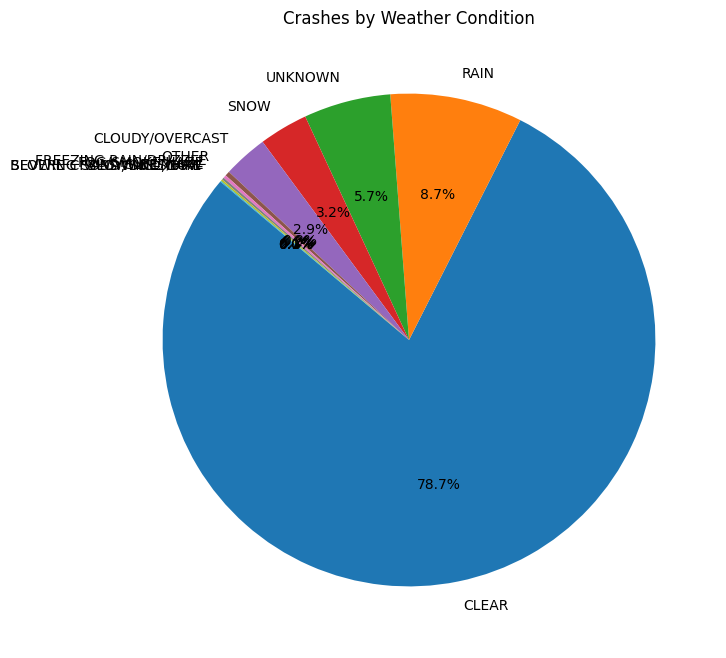

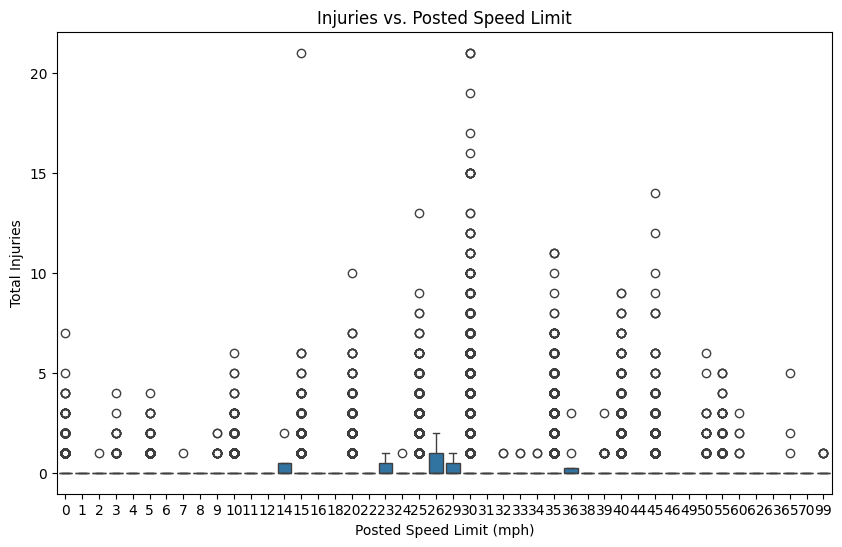

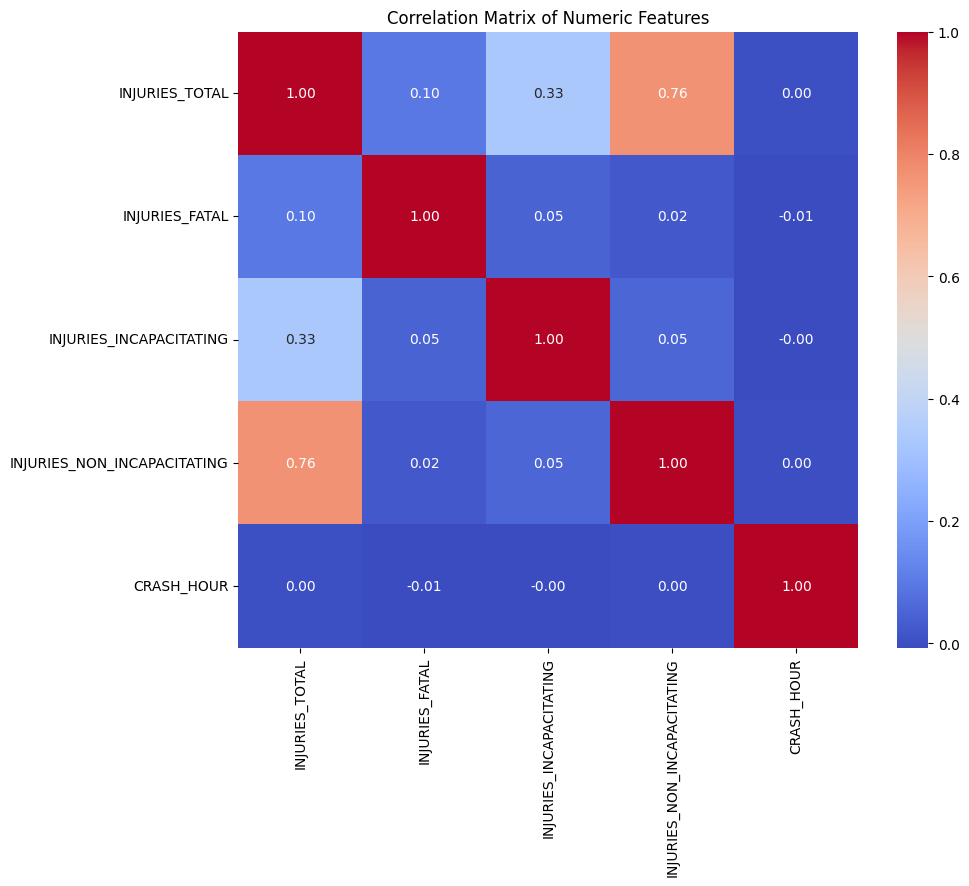

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# dataset
file_path = 'traffic_crashes.csv'
data = pd.read_csv(file_path)

day_of_week_counts = data['CRASH_DAY_OF_WEEK'].value_counts().reset_index()
day_of_week_counts.columns = ['CRASH_DAY_OF_WEEK', 'count']  # Rename columns for clarity

fig1 = px.bar(
    day_of_week_counts,
    x='CRASH_DAY_OF_WEEK',
    y='count',
    title='Interactive Crashes by Day of the Week',
    labels={'CRASH_DAY_OF_WEEK': 'Day of the Week', 'count': 'Number of Crashes'},
)
fig1.update_traces(marker_color='skyblue')
# fig1.show()
# fig1.show(renderer="notebook")
fig1.show(renderer="browser")

fig2 = px.scatter(
    data,
    x='LONGITUDE',
    y='LATITUDE',
    color='LIGHTING_CONDITION',
    hover_data=['CRASH_DATE', 'FIRST_CRASH_TYPE'],
    title='Interactive Geographical Distribution of Crashes',
    labels={'LONGITUDE': 'Longitude', 'LATITUDE': 'Latitude'},
)
fig2.update_traces(marker=dict(size=5, opacity=0.6))
# fig2.show()
fig2.show(renderer="browser")


fig3 = px.histogram(
    data,
    x='CRASH_HOUR',
    nbins=24,
    title='Interactive Distribution of Crashes by Hour',
    labels={'CRASH_HOUR': 'Crash Hour'},
)
fig3.update_traces(marker_color='orange')
# fig3.show()
fig3.show(renderer="browser")

weather_counts = data['WEATHER_CONDITION'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Crashes by Weather Condition')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='POSTED_SPEED_LIMIT', y='INJURIES_TOTAL', data=data)
plt.title('Injuries vs. Posted Speed Limit')
plt.xlabel('Posted Speed Limit (mph)')
plt.ylabel('Total Injuries')
plt.show()

numeric_cols = ['INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 
                'INJURIES_NON_INCAPACITATING', 'CRASH_HOUR']
correlation_matrix = data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


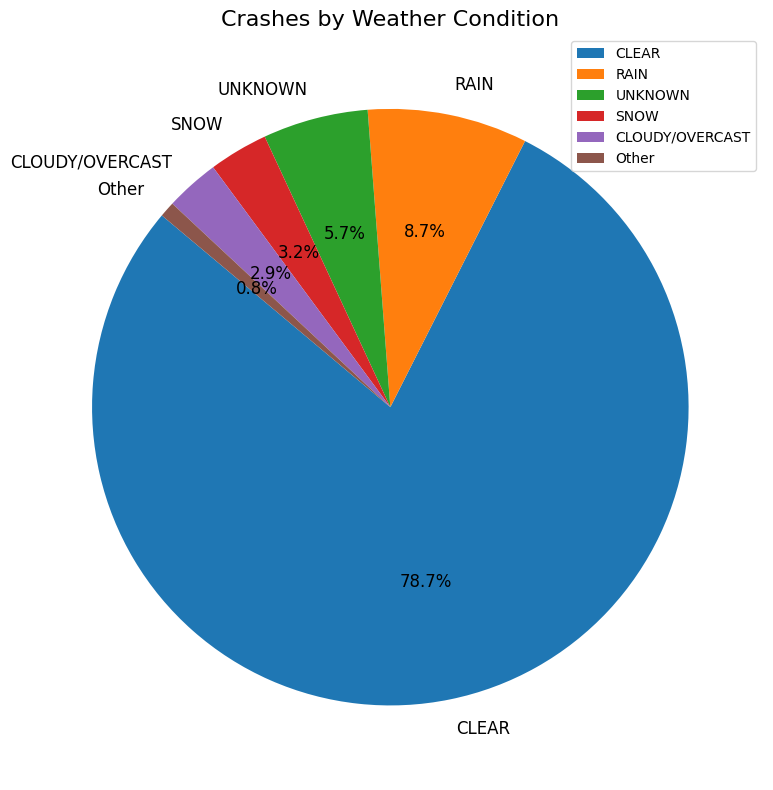

In [12]:
weather_counts = data['WEATHER_CONDITION'].value_counts()

# group smaller categories into other
threshold = 0.02 * weather_counts.sum()
weather_counts_fixed = weather_counts[weather_counts >= threshold]
weather_counts_fixed['Other'] = weather_counts[weather_counts < threshold].sum()

plt.figure(figsize=(10, 8))
plt.pie(
    weather_counts_fixed,
    labels=weather_counts_fixed.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12},
)
plt.title('Crashes by Weather Condition', fontsize=16)
plt.legend(loc="best", fontsize=10)
plt.tight_layout()  # adj layout to prevent overlaps
plt.show()
